#imolecule in the IPython notebook

I created imolecule to fix a deficiency in my workflow. While my chemical simulations were entirely in notebooks, I had to use external programs like mercury to visually debug chemical structures. Mercury is a good program, but dropping out of the notebook felt clumsy and made my work less reproducible.

This is my solution. It's a short javascript file that makes heavy use of [three.js](http://threejs.org/) to render 3D shapes. This code is connected to the notebook with a simple Python API, and can be used like so:

In [1]:
import imolecule
imolecule.draw("CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C")

It can also load files directly, automatically using the file extension to determine format.

In [2]:
imolecule.draw("data/NaX.cif")

When viewing crystal pores, you usually want to use an orthographic camera and a space-filling model. You may also want to make the initial window size bigger for static viewing.

In [3]:
import imolecule
imolecule.draw("data/NaX.cif", drawing_type="space filling", camera_type="orthographic", size=(800, 600))

For advanced usage, create highly customized outputs by combining with your own html.

In [4]:
from IPython.display import display, HTML
carbons = ("c1{}c1".format("c" * i) for i in range(3, 7))
shaders = ("basic", "lambert", "phong", "toon")
renders = (imolecule.draw(c, size=(200, 150), shader=s, display_html=False) for c, s in zip(carbons, shaders))
columns = ('<div class="col-xs-6 col-sm-3">{}</div>'.format(r) for r in renders)
display(HTML('<div class="row">{}</div>'.format("".join(columns))))

Read the docs for more.

In [5]:
help(imolecule.draw)

Help on function draw in module imolecule.notebook:

draw(data, format='auto', size=(400, 300), drawing_type='ball and stick', camera_type='perspective', shader='lambert', display_html=True)
    Draws an interactive 3D visualization of the inputted chemical.
    
    Args:
        data: A string or file representing a chemical.
        format: The format of the `data` variable (default is "auto").
        size: Starting dimensions of visualization, in pixels.
        drawing_type: Specifies the molecular representation. Can be "ball and
            stick", "wireframe", or "space filling".
        camera_type: Can be "perspective" or "orthographic".
        shader: Specifies shading algorithm to use. Can be "toon", "basic",
            "phong", or "lambert".
        display_html: If True (default), embed the html in a IPython display.
            If False, return the html as a string.
    
    The `format` can be any value specified by Open Babel
    (http://openbabel.org/docs/2.3.1/Fil

If you use open babel, you may already have imolecule! It has been in the development version of open babel since September 2013. Set the `pybel.ipython_3d` variable to True, and open babel will render your molecules.

In [6]:
import pybel
pybel.ipython_3d = True
sarin = pybel.readstring("smi", "CCOP(=O)(C)SCCN(C(C)C)C(C)C")
sarin

If you use RDKit, you may also have imolecule! The code has been in RDKit since May 2014.

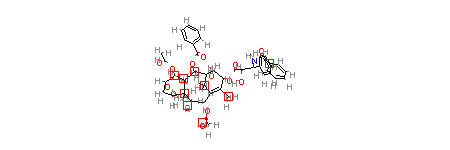

In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True

taxol = ("CC(=O)OC1C2=C(C)C(CC(O)(C(OC(=O)c3ccccc3)C4C5(COC5CC(O)C4(C)C1=O)"
         "OC(=O)C)C2(C)C)OC(=O)C(O)C(NC(=O)c6ccccc6)c7ccccc7")
mol = Chem.AddHs(Chem.MolFromSmiles(taxol))
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)
mol